<a href="https://colab.research.google.com/github/charlieswb/Learning/blob/master/Tensorflow/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense
import numpy as np

In [2]:
X = np.eye(8).astype(np.float32)
X

array([[1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [5]:
# 8-3-8
class AutoEncoder(keras.Model):
  def __init__(self):
    super().__init__()
    self.encoder = Dense(3, activation='sigmoid')
    self.decoder = Dense(8, activation='sigmoid')
  def call(self, inp):
    outputs = self.decoder(self.encoder(inp))
    return outputs

In [6]:
model = AutoEncoder()
model.compile(loss=keras.losses.MeanSquaredError(), optimizer=keras.optimizers.SGD(learning_rate=3.5))

In [7]:
model.fit(X, X, epochs=2000, verbose=0)

In [8]:
Z = tf.round(model(X))
Z

<tf.Tensor: shape=(8, 8), dtype=float32, numpy=
array([[1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)>

In [11]:
tf.round(model.encoder(X))

<tf.Tensor: shape=(8, 3), dtype=float32, numpy=
array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 1., 1.],
       [0., 1., 1.],
       [0., 0., 0.],
       [1., 1., 0.],
       [1., 0., 1.],
       [0., 0., 1.]], dtype=float32)>

In [12]:
X_encoded = np.array([[0, 0, 0],
                      [0, 0, 1],
                      [1, 0, 0],
                      [1, 1, 0]],dtype='float32')

In [13]:
tf.round(model.decoder(X_encoded))

<tf.Tensor: shape=(4, 8), dtype=float32, numpy=
array([[0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)>

**Feature extraction**

In [18]:
from tensorflow.keras import Model, Input, losses, optimizers, datasets
from tensorflow.keras.layers import Flatten
import matplotlib.pyplot as plt

In [22]:
(X_train, Y_train), (X_test, Y_test) = datasets.mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0
print(X_train.shape)
print(Y_train.shape)

(60000, 28, 28)
(60000,)


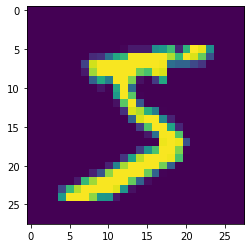

In [23]:
plt.imshow(X_train[0])
plt.show()

In [29]:
# 28*28--784-392-196-98-196-392-784
inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))
flat = Flatten()

en1 = Dense(size//2, activation='relu')
en2 = Dense(size//4, activation='relu')
en3 = Dense(size//8, activation='relu')

de1 = Dense(size//4, activation='relu')
de2 = Dense(size//2, activation='relu')
de3 = Dense(size, activation='relu')

outputs = de3(de2(de1(en3(en2(en1(flat(inputs)))))))
outputs = tf.reshape(outputs, [-1,X_train.shape[1], X_train.shape[2]])

model = Model(inputs, outputs)

In [30]:
model.compile(loss=losses.MeanSquaredError(), optimizer=optimizers.SGD(learning_rate=0.1))

In [31]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 392)               307720    
_________________________________________________________________
dense_9 (Dense)              (None, 196)               77028     
_________________________________________________________________
dense_10 (Dense)             (None, 98)                19306     
_________________________________________________________________
dense_11 (Dense)             (None, 196)               19404     
_________________________________________________________________
dense_12 (Dense)             (None, 392)               7722

In [32]:
model.fit(X_train, X_train, epochs=200, verbose=0)

Epoch 1/200
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0813
Epoch 2/200
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0702
Epoch 3/200
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0590
Epoch 4/200
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0517
Epoch 5/200
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0470
Epoch 6/200
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0440
Epoch 7/200
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0417
Epoch 8/200
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0395
Epoch 9/200
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0378
Epoch 10/200
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0365
Epoch 11/200
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0353
Epoch 12/200
1875/1875 [==============================] - 3s 2ms/step - lo

**Comparison**

In [33]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

Original

In [36]:
X_train_flat = X_train.reshape((len(X_train), -1))
X_test_flat = X_test.reshape((len(X_test), -1))

In [ ]:
clf1 = SVC()
clf1.fit(X_train_flat, Y_train)

In [38]:
Z1 = clf1.predict(X_test_flat)
print('accuracy rate =', accuracy_score(Y_test, Z1))
print('Confusion matrix:')
print(confusion_matrix(Y_test, Z1))

accuracy rate = 0.9792
Confusion matrix:
[[ 973    0    1    0    0    2    1    1    2    0]
 [   0 1126    3    1    0    1    1    1    2    0]
 [   6    1 1006    2    1    0    2    7    6    1]
 [   0    0    2  995    0    2    0    5    5    1]
 [   0    0    5    0  961    0    3    0    2   11]
 [   2    0    0    9    0  871    4    1    4    1]
 [   6    2    0    0    2    3  944    0    1    0]
 [   0    6   11    1    1    0    0  996    2   11]
 [   3    0    2    6    3    2    2    3  950    3]
 [   3    4    1    7   10    2    1    7    4  970]]


Encoded

In [39]:
X_train_encoded = en3(en2(en1(flat(X_train)))).numpy()
X_test_encoded = en3(en2(en1(flat(X_test)))).numpy()
print(X_train_encoded.shape)
print(X_test_encoded.shape)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

(60000, 98)
(10000, 98)


In [40]:
clf2 = SVC()
clf2.fit(X_train_encoded, Y_train)
Z2 = clf2.predict(X_test_encoded)
print('accuracy rate =', accuracy_score(Y_test, Z2))
print('Confusion matrix:')
print(confusion_matrix(Y_test, Z2))

accuracy rate = 0.9508
Confusion matrix:
[[ 970    0    2    2    1    2    1    1    1    0]
 [   0 1122    2    2    0    1    4    1    3    0]
 [   9    1  977    7    5    2   13    7   10    1]
 [   2    1   11  955    0   13    1    9   16    2]
 [   1    0    7    1  935    0    6    3    3   26]
 [   8    2    2   28    7  819    8    1   14    3]
 [   8    3    2    1    4    8  929    0    3    0]
 [   2   11   18    4    6    1    0  963    6   17]
 [   4    4    5   15    6   18    9    5  903    5]
 [   6    4    1   13   27    6    1   10    6  935]]


In [41]:
model.save_weights('jojo')

Reconstruction

In [44]:
recon = tf.reshape(de3(de2(de1(X_test_encoded))), [-1,X_test.shape[1], X_test.shape[2]]).numpy()
recon.shape

(10000, 28, 28)

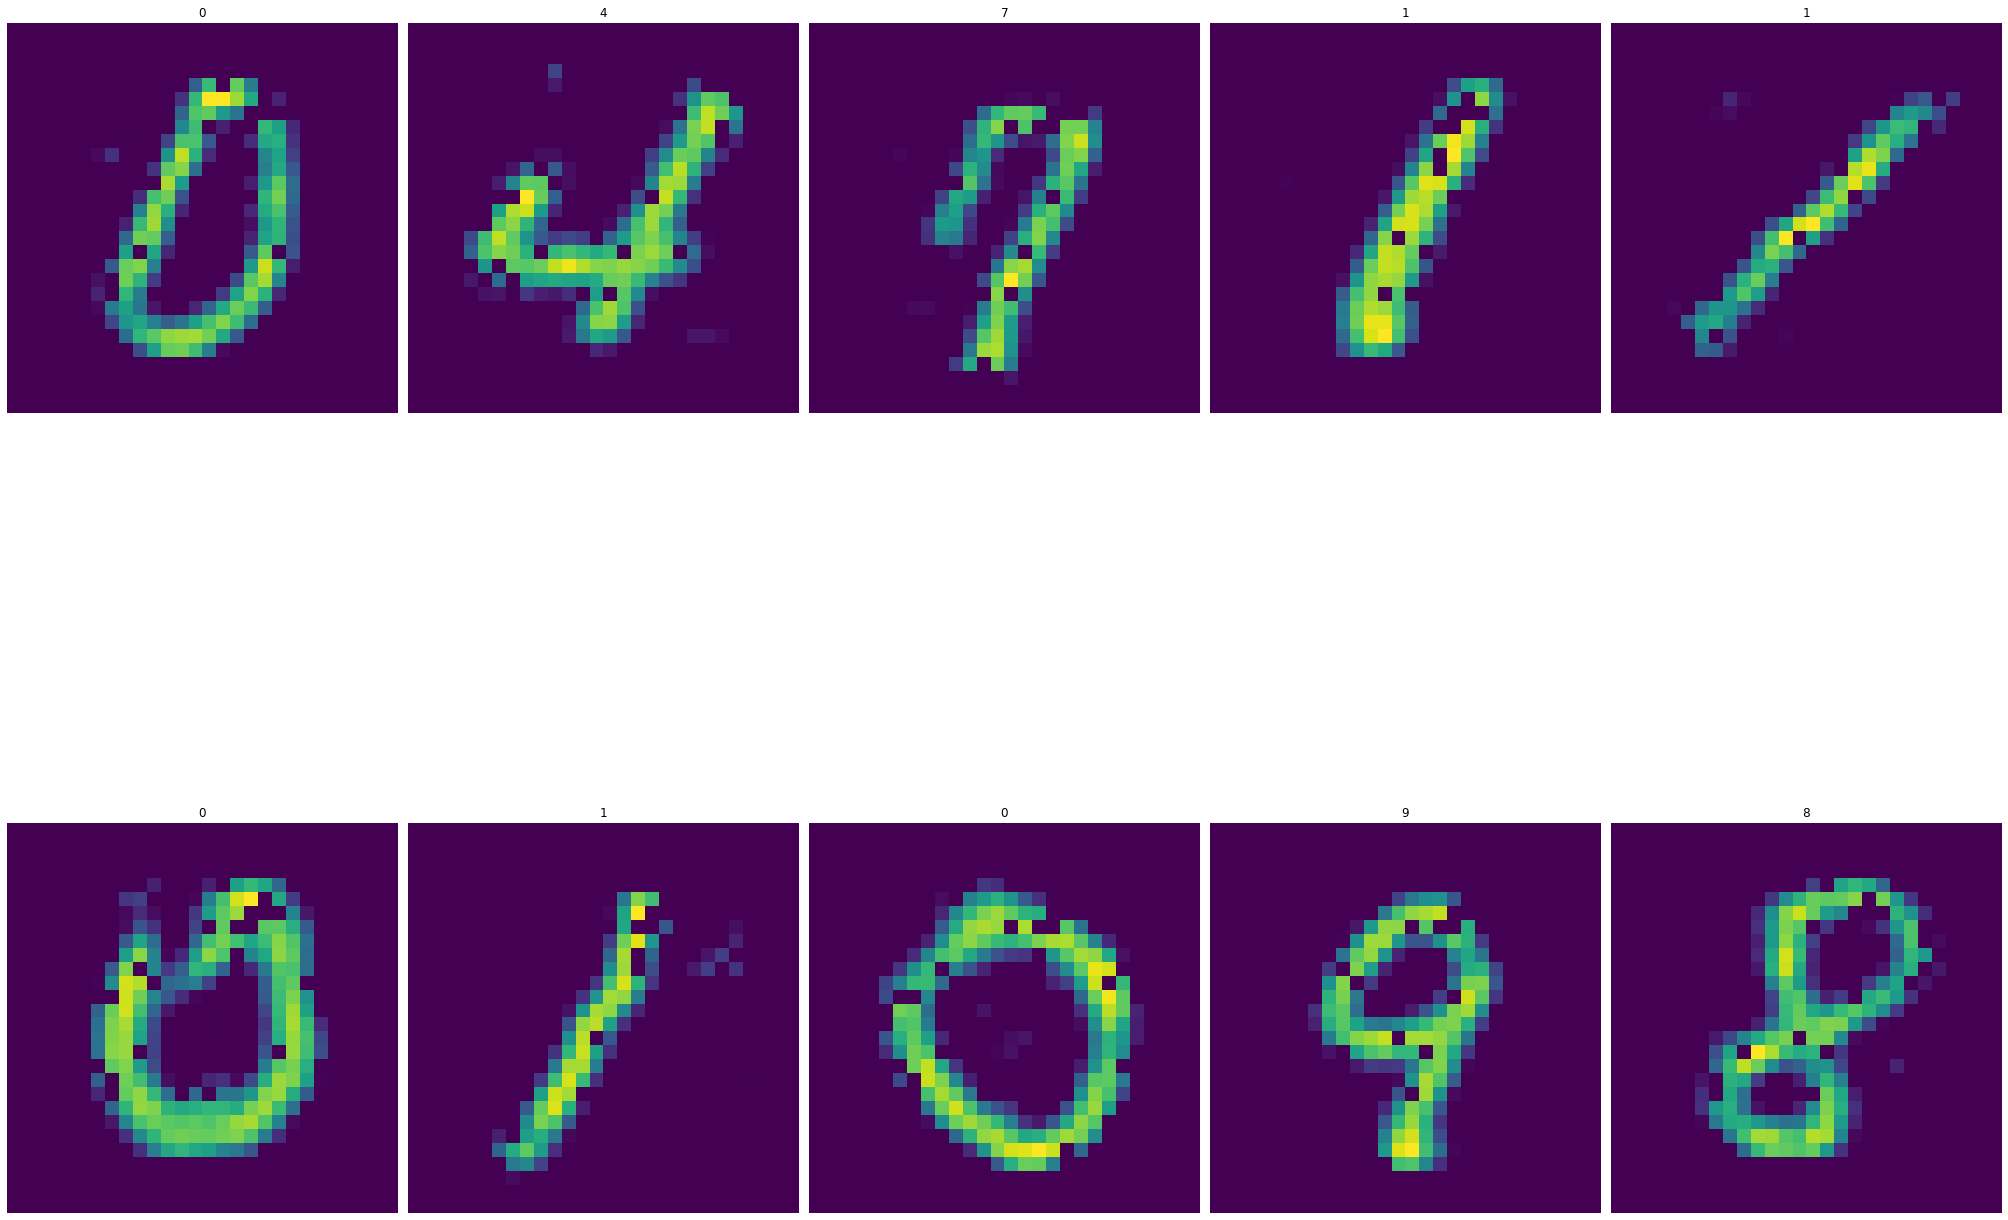

In [47]:
n = 10
plt.figure(figsize=(28,28))
for j, i in enumerate(np.random.randint(0, len(recon), n)):
  plt.subplot(n//5, 5, j+1)
  plt.imshow(recon[i])
  plt.title(Y_test[i])
  plt.axis('off')
plt.tight_layout()
plt.show()